In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
import glob
import pickle
import os

In [2]:
# Concatenate the data for all car makes
path = r'C:\Users\adria\Documents\GitHub\UsedCarsValuePredictionML\Data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []
brands = ["Audi","BMW","Ford","Hyundi","Mercedes Benz","Skoda","Toyota","Volkswagen"]

for filename, brand in zip(all_files, brands):
    df = pd.read_csv(filename, index_col=None, header=0)
    df["make"] = brand
    li.append(df)
    
df = pd.concat(li, axis=0, ignore_index=True)
df


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
85550,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,Volkswagen
85551,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,Volkswagen
85552,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,Volkswagen
85553,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,Volkswagen


In [3]:
df=df.loc[df['year']<2021,:]

In [4]:
# df['model']=df['model'].str.lstrip()

In [5]:
df.to_csv('frame.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85554 entries, 0 to 85554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         85554 non-null  object 
 1   year          85554 non-null  int64  
 2   price         85554 non-null  int64  
 3   transmission  85554 non-null  object 
 4   mileage       85554 non-null  int64  
 5   fuelType      85554 non-null  object 
 6   tax           85554 non-null  int64  
 7   mpg           85554 non-null  float64
 8   engineSize    85554 non-null  float64
 9   make          85554 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.2+ MB


In [7]:
# # Use Pandas get_dummies to convert categorical data
frame_one_hot = pd.get_dummies(df, columns =['model', 'transmission', 'fuelType', 'make'])
frame_one_hot.head()

,year,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,fuelType_Other,fuelType_Petrol,make_Audi,make_BMW,make_Ford,make_Hyundi,make_Mercedes Benz,make_Skoda,make_Toyota,make_Volkswagen
0,2017,12500,15735,150,55.4,1.4,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2016,11000,29946,30,55.4,1.4,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,2017,16800,25952,145,67.3,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2019,17300,1998,145,49.6,1.0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [8]:
# # Assign X (data) and y (target)
X = frame_one_hot.drop(['price'],axis=1)
y = frame_one_hot["price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(85554, 195) (85554, 1)


In [9]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
#Scale Data
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

In [11]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [12]:
X_train_scaled

array([[0.92      , 0.09169364, 0.05172414, ..., 0.        , 0.        ,
        0.        ],
       [0.94      , 0.03684679, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.01332671, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.92      , 0.1085137 , 0.05172414, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.00185001, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.01176337, 0.25      , ..., 0.        , 0.        ,
        0.        ]])

# Define Neural Network Model

In [13]:
NNmodel = Sequential()
NNmodel.add(Dense(100, input_dim=195, kernel_initializer='normal', activation='relu'))
NNmodel.add(Dense(50, activation='relu'))
NNmodel.add(Dense(1, activation='linear'))
NNmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               19600     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 24,701
Trainable params: 24,701
Non-trainable params: 0
_________________________________________________________________


# Compile the model

In [14]:
NNmodel.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

# Training the model

In [15]:
# Fit (train) the model
history=NNmodel.fit(X_train_scaled, y_train_scaled, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/150
1027/1027 [==============================] - 1s 760us/step - loss: 8.3576e-04 - mse: 8.3576e-04 - mae: 0.0176 - val_loss: 4.7821e-04 - val_mse: 4.7821e-04 - val_mae: 0.0142
Epoch 2/150
1027/1027 [==============================] - 1s 645us/step - loss: 4.2943e-04 - mse: 4.2943e-04 - mae: 0.0134 - val_loss: 4.1105e-04 - val_mse: 4.1105e-04 - val_mae: 0.0135
Epoch 3/150
1027/1027 [==============================] - 1s 652us/step - loss: 3.8184e-04 - mse: 3.8184e-04 - mae: 0.0126 - val_loss: 3.6708e-04 - val_mse: 3.6708e-04 - val_mae: 0.0128
Epoch 4/150
1027/1027 [==============================] - 1s 643us/step - loss: 3.4257e-04 - mse: 3.4257e-04 - mae: 0.0120 - val_loss: 3.5298e-04 - val_mse: 3.5298e-04 - val_mae: 0.0125
Epoch 5/150
1027/1027 [==============================] - 1s 649us/step - loss: 3.2720e-04 - mse: 3.2720e-04 - mae: 0.0116 - val_loss: 2.8496e-04 - val_mse: 2.8496e-04 - val_mae: 0.0113
Epoch 6/150
1027/1027 [==============================] - 1s 685us/step - lo

1027/1027 [==============================] - 1s 1ms/step - loss: 1.9672e-04 - mse: 1.9672e-04 - mae: 0.0088 - val_loss: 2.0847e-04 - val_mse: 2.0847e-04 - val_mae: 0.0093
Epoch 46/150
1027/1027 [==============================] - 1s 1ms/step - loss: 2.0132e-04 - mse: 2.0132e-04 - mae: 0.0089 - val_loss: 2.0936e-04 - val_mse: 2.0936e-04 - val_mae: 0.0093
Epoch 47/150
1027/1027 [==============================] - 1s 834us/step - loss: 1.9703e-04 - mse: 1.9703e-04 - mae: 0.0088 - val_loss: 2.3489e-04 - val_mse: 2.3489e-04 - val_mae: 0.0100
Epoch 48/150
1027/1027 [==============================] - 1s 783us/step - loss: 1.9713e-04 - mse: 1.9713e-04 - mae: 0.0089 - val_loss: 2.1696e-04 - val_mse: 2.1696e-04 - val_mae: 0.0099
Epoch 49/150
1027/1027 [==============================] - 1s 804us/step - loss: 1.9461e-04 - mse: 1.9461e-04 - mae: 0.0087 - val_loss: 2.0014e-04 - val_mse: 2.0014e-04 - val_mae: 0.0091
Epoch 50/150
1027/1027 [==============================] - 1s 814us/step - loss: 1.9417e

1027/1027 [==============================] - 1s 776us/step - loss: 1.7946e-04 - mse: 1.7946e-04 - mae: 0.0084 - val_loss: 2.0627e-04 - val_mse: 2.0627e-04 - val_mae: 0.0090
Epoch 90/150
1027/1027 [==============================] - 1s 769us/step - loss: 1.8109e-04 - mse: 1.8109e-04 - mae: 0.0084 - val_loss: 1.9316e-04 - val_mse: 1.9316e-04 - val_mae: 0.0089
Epoch 91/150
1027/1027 [==============================] - 1s 819us/step - loss: 1.7855e-04 - mse: 1.7855e-04 - mae: 0.0084 - val_loss: 2.1062e-04 - val_mse: 2.1062e-04 - val_mae: 0.0094
Epoch 92/150
1027/1027 [==============================] - 1s 893us/step - loss: 1.7708e-04 - mse: 1.7708e-04 - mae: 0.0084 - val_loss: 1.9915e-04 - val_mse: 1.9915e-04 - val_mae: 0.0090
Epoch 93/150
1027/1027 [==============================] - 1s 896us/step - loss: 1.7876e-04 - mse: 1.7876e-04 - mae: 0.0084 - val_loss: 1.9217e-04 - val_mse: 1.9217e-04 - val_mae: 0.0087
Epoch 94/150
1027/1027 [==============================] - 1s 796us/step - loss: 1.7

Epoch 133/150
1027/1027 [==============================] - 1s 805us/step - loss: 1.7322e-04 - mse: 1.7322e-04 - mae: 0.0082 - val_loss: 1.9166e-04 - val_mse: 1.9166e-04 - val_mae: 0.0087
Epoch 134/150
1027/1027 [==============================] - 1s 815us/step - loss: 1.6946e-04 - mse: 1.6946e-04 - mae: 0.0082 - val_loss: 1.8910e-04 - val_mse: 1.8910e-04 - val_mae: 0.0087
Epoch 135/150
1027/1027 [==============================] - 1s 796us/step - loss: 1.7366e-04 - mse: 1.7366e-04 - mae: 0.0083 - val_loss: 1.8646e-04 - val_mse: 1.8646e-04 - val_mae: 0.0087
Epoch 136/150
1027/1027 [==============================] - 1s 792us/step - loss: 1.7049e-04 - mse: 1.7049e-04 - mae: 0.0082 - val_loss: 1.9210e-04 - val_mse: 1.9210e-04 - val_mae: 0.0087
Epoch 137/150
1027/1027 [==============================] - 1s 883us/step - loss: 1.6827e-04 - mse: 1.6827e-04 - mae: 0.0082 - val_loss: 1.9874e-04 - val_mse: 1.9874e-04 - val_mae: 0.0091
Epoch 138/150
1027/1027 [==============================] - 1s 844

# Quantifying the model

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


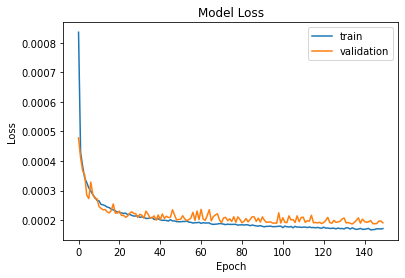

In [16]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [17]:
#X.to_csv('x.csv')

# Prediction

## User Input

In [18]:
# User entered data
make='Audi'
model='A1'
year=2017
transmission='Manual'
mileage=15735
fuelType='Petrol'
tax=150
mpg=55.4
engineSize=1.4

In [19]:
#Create an array with the user entered data
def new_data(make,model,year,transmission,mileage,fuelType,tax,mpg,engineSize):
    new_data=[]
     
    new_data.append(year)
    new_data.append(mileage)
    new_data.append(tax)
    new_data.append(mpg)
    new_data.append(engineSize)
    
    model_array=find_model_array(model)
    for i in model_array:
        new_data.append(i)
        
    trans_array=find_trans_array(transmission)
    for i in trans_array:
        new_data.append(i)
    
    fuelType_array=find_fuelType_array(fuelType)
    for i in fuelType_array:
        new_data.append(i)
    
    make_array=find_make_array(make)
    for i in make_array:
        new_data.append(i)
    
    return new_data
    

In [20]:
def find_model_array(model):
    model_matrix=pd.read_csv('Matrix/Make_Model_Matrix.csv')
    model_matrix=model_matrix.fillna(0)
    find_model=model_matrix.loc[model_matrix['model']==model,:]
    model_array=find_model.iloc[0,2:].tolist()
    return (model_array)


In [21]:
def find_trans_array(transmission):
    trans_matrix=pd.read_csv('Matrix/Transmission_Matrix.csv')
    find_trans=trans_matrix.loc[trans_matrix['transmission']==transmission,:]
    trans_array=find_trans.iloc[0,1:].tolist()
    return (trans_array)

In [22]:
def find_fuelType_array(fuelType):
    fuelType_matrix=pd.read_csv('Matrix/fuelType_Matrix.csv')
    fuelType_matrix=fuelType_matrix.fillna(0)
    find_fuelType=fuelType_matrix.loc[fuelType_matrix['fuelType']==fuelType,:]
    fuelType_array=find_fuelType.iloc[0,1:].tolist()
    return (fuelType_array)

In [23]:
def find_make_array(make):
    make_matrix=pd.read_csv('Matrix/Make_Matrix.csv')
    make_matrix=make_matrix.fillna(0)
    find_make=make_matrix.loc[make_matrix['make']==make,:]
    make_array=find_make.iloc[0,1:].tolist()
    return (make_array)

In [24]:
new_data_list=new_data(make,model,year,transmission,mileage,fuelType,tax,mpg,engineSize)

In [25]:
print(new_data_list)

[2017, 15735, 150, 55.4, 1.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 1, 0, 0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Predict Price from User Data

In [26]:
X_new = np.array(new_data_list).reshape(1,195)

In [27]:
X_new= X_scaler.transform(X_new)
y_new= NNmodel.predict(X_new)
#invert normalize
y_new = y_scaler.inverse_transform(y_new) 
X_new = X_scaler.inverse_transform(X_new)
print("X=%s, Predicted=%s" % (X_new[0], y_new[0]))

X=[2.0170e+03 1.5735e+04 1.5000e+02 5.5400e+01 1.4000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.00

In [28]:
pkl_filename = "DeepNeuralNetwroks.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)